In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [48]:
%matplotlib inline

import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
import cPickle as pickle

import fiona
import code.pyshp.shapefile as shapefile
from shapely.geometry import Polygon, MultiPolygon, shape
from descartes import PolygonPatch

from code.shapefiles import sf_to_df

In [42]:
df = pickle.load(open('featuresdf.pkl', 'rb'))

In [25]:
sf = shapefile.Reader('data/uscensus/tl_2010_06075_tabblock10/tl_2010_06075_tabblock10.dbf')
shapes = sf.shapes()

In [26]:
for name in dir(shapes[0]):
    if not name.startswith('__'):
        print name

bbox
parts
points
shapeType


In [39]:
slens = []
polys = []
for shape in shapes:
    slens.append(len(shape.points))
    polys.append(Polygon(shape.points))
    
len(slens)

7386

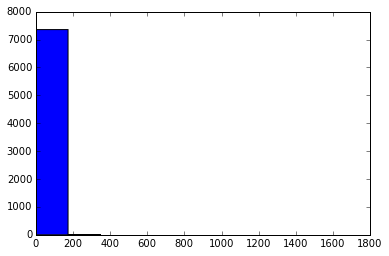

In [36]:
plt.hist(slens);

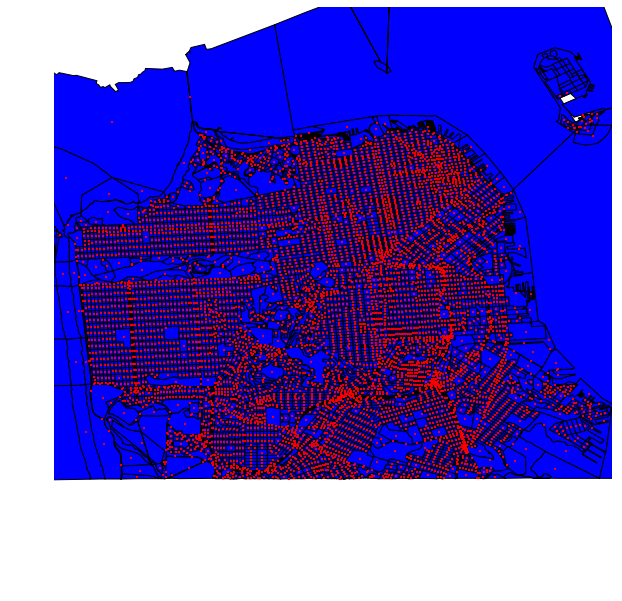

In [45]:
df.plot(kind='scatter', x='lon', y='lat', linewidths=0, figsize=(10,10), s=5, c='red')
plt.axis('equal')
plt.axis('off')
plt.margins(0)
ax = plt.gca()
for poly in polys:
    patch = PolygonPatch(poly, zorder=-1)
    ax.add_patch(patch)

In [47]:
len(sf.records())

7386

In [49]:
rdf = sf_to_df('data/uscensus/tl_2010_06075_tabblock10/tl_2010_06075_tabblock10.dbf')
print rdf.shape
print rdf.info()
rdf.head()

(7386, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7386 entries, 0 to 7385
Data columns (total 11 columns):
state         7386 non-null object
county        7386 non-null object
tract         7386 non-null object
block         7386 non-null object
geoid         7386 non-null int64
name          7386 non-null object
mtfcc         7386 non-null object
land_area     7386 non-null int64
water_area    7386 non-null int64
lat           7386 non-null float64
lon           7386 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 692.4+ KB
None


,state,county,tract,block,geoid,name,mtfcc,land_area,water_area,lat,lon
0,06,075,021300,2002,60750213002002,Block 2002,G5040,16958,0,37.750067,-122.441075
1,06,075,021300,2000,60750213002000,Block 2000,G5040,16823,0,37.750196,-122.438933
2,06,075,020500,3004,60750205003004,Block 3004,G5040,17020,0,37.756794,-122.436270
3,06,075,021200,1003,60750212001003,Block 1003,G5040,16415,0,37.753529,-122.437050
4,06,075,021100,4001,60750211004001,Block 4001,G5040,17523,0,37.755758,-122.433400


In [50]:
rdf['polys'] = polys

In [51]:
rdf = rdf[['lat', 'lon', 'polys']]

In [53]:
print rdf.shape
rdf.head()

(7386, 3)


,lat,lon,polys
0,37.750067,-122.441075,"POLYGON ((-122.440616 37.750902, -122.440459 3..."
1,37.750196,-122.438933,"POLYGON ((-122.438397 37.750226, -122.43832 37..."
2,37.756794,-122.436270,"POLYGON ((-122.435808 37.757623, -122.435642 3..."
3,37.753529,-122.437050,"POLYGON ((-122.436527 37.75354, -122.436454 37..."
4,37.755758,-122.433400,"POLYGON ((-122.432331 37.756227, -122.432254 3..."


In [54]:
print df.shape

(7334, 11)
